# Общая аналитика блокчейн-арбитража

## Библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

sns.set_style("darkgrid")

## Открытие данных

In [2]:
names = ['spread', 'start_buy_price', 'start_sell_price', 'end_buy_price', 'end_sell_price', 'start_time', 'end_time', 'ticker', 'buy_exchange', 'sell_exchange']
data = pd.read_csv('Datasets/arbitrage_data.tsv', names=names)

data['start_time'] = data['start_time'].apply(lambda x: datetime.fromtimestamp(x))
data['end_time'] = data['end_time'].apply(lambda x: datetime.fromtimestamp(x))
data['total_time'] = data['end_time'] - data['start_time']
data['total_time'] = data['total_time'].apply(lambda x: x.total_seconds())
data.head()

,spread,start_buy_price,start_sell_price,end_buy_price,end_sell_price,start_time,end_time,ticker,buy_exchange,sell_exchange,total_time
0,42.334,0.02975,0.05100,0.02268,0.02276,2022-11-01 00:00:00,2022-11-23 04:01:00,MDT/USDT,binance,mexc,1915260.0
1,1.500,0.02266,0.02300,0.02262,0.02275,2022-11-23 04:07:00,2022-11-23 04:07:00,MDT/USDT,binance,mexc,0.0
2,2.080,0.02263,0.02310,0.02263,0.02270,2022-11-23 04:13:00,2022-11-23 04:13:00,MDT/USDT,binance,mexc,0.0
3,1.190,0.02263,0.02290,0.02263,0.02280,2022-11-23 04:16:00,2022-11-23 04:16:00,MDT/USDT,binance,mexc,0.0
4,1.433,0.02281,0.02309,0.02294,0.02309,2022-11-23 07:04:00,2022-11-23 07:11:00,MDT/USDT,binance,mexc,420.0


## Общии графики

### Среднее время

In [3]:
print(data['total_time'].mean())

0 days 00:23:45.472263269


### Средний spread

In [4]:
print(data['spread'].mean())

2.450480649161667


### Spread и время начала арбитража

<AxesSubplot: xlabel='start_time', ylabel='spread'>

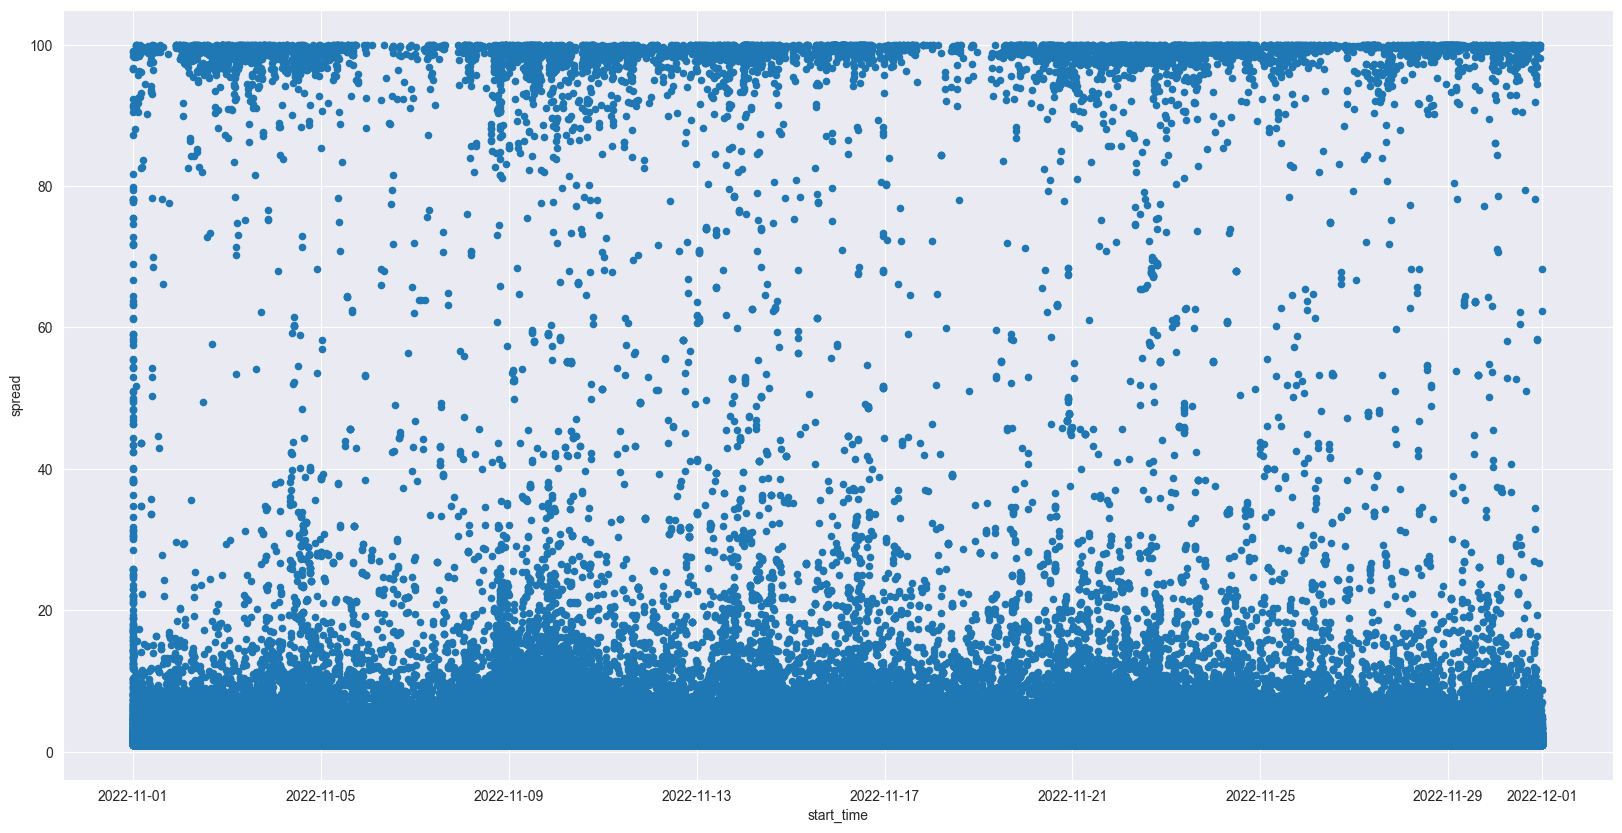

In [3]:
data.plot.scatter(x='start_time', y='spread', figsize=(20, 10))

<AxesSubplot: xlabel='start_time', ylabel='spread'>

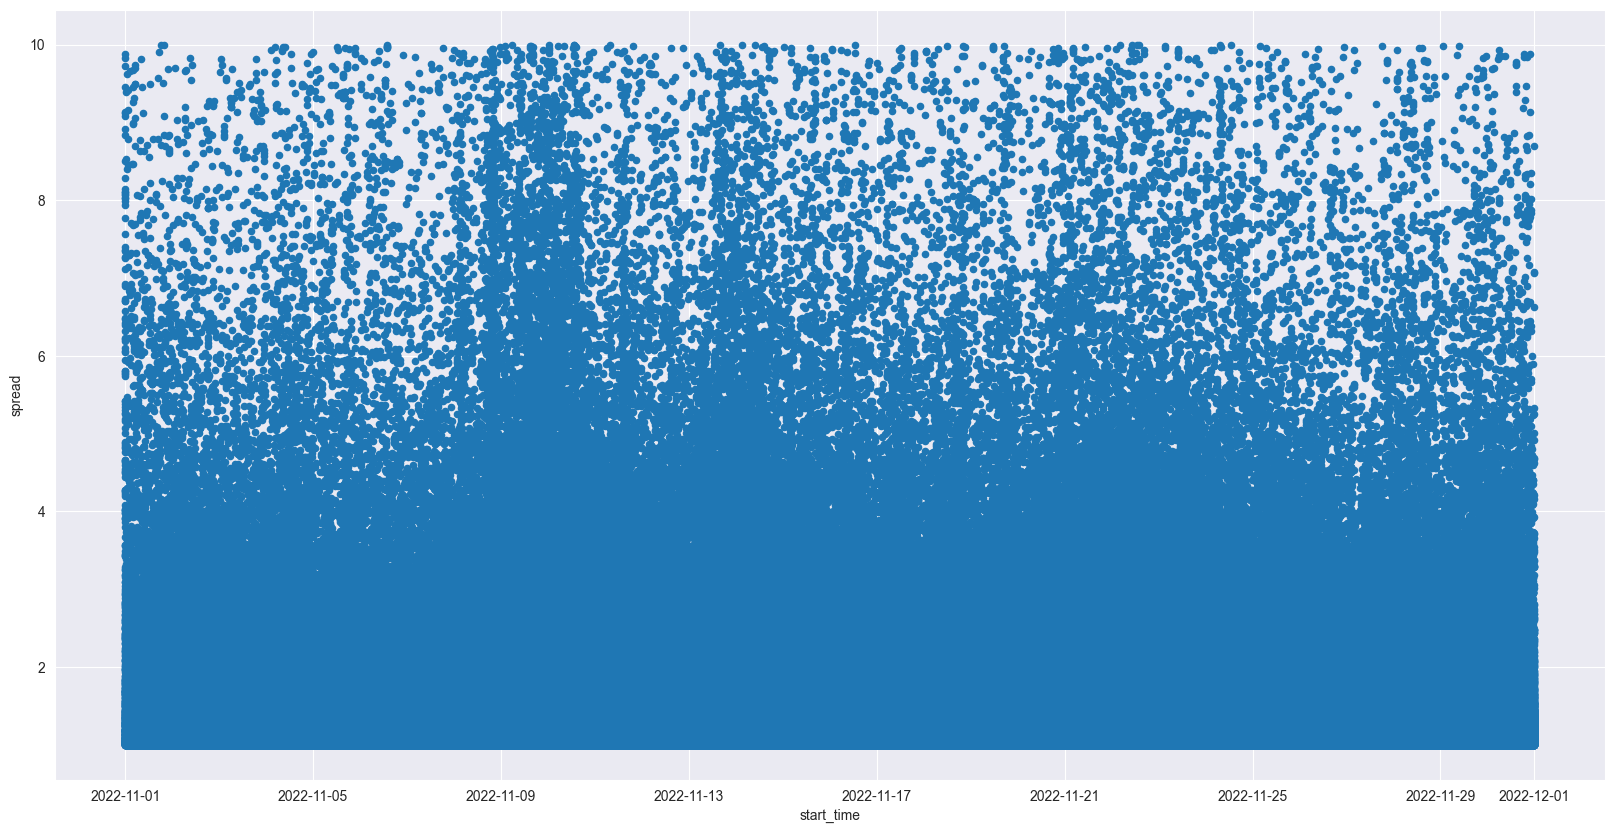

In [4]:
data.loc[data['spread'] <= 10].plot.scatter(x='start_time', y='spread', figsize=(20, 10))

<AxesSubplot: >

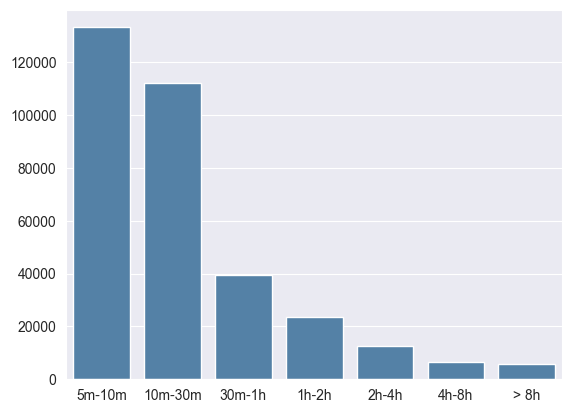

In [5]:
data['groups'] = pd.cut(data['total_time'], [300, 600, 1800, 3600, 7200, 14400, 28800, data['total_time'].max()],
                        include_lowest=True)
values = data.groupby('groups')['total_time'].count()
values.index = ['5m-10m', '10m-30m', '30m-1h', '1h-2h', '2h-4h', '4h-8h', '> 8h']
sns.barplot(x=values.index, y=values.values, color='steelblue')

## Анализ spread

### Проверка на сход цены

<AxesSubplot: xlabel='start_time', ylabel='end_price_difference'>

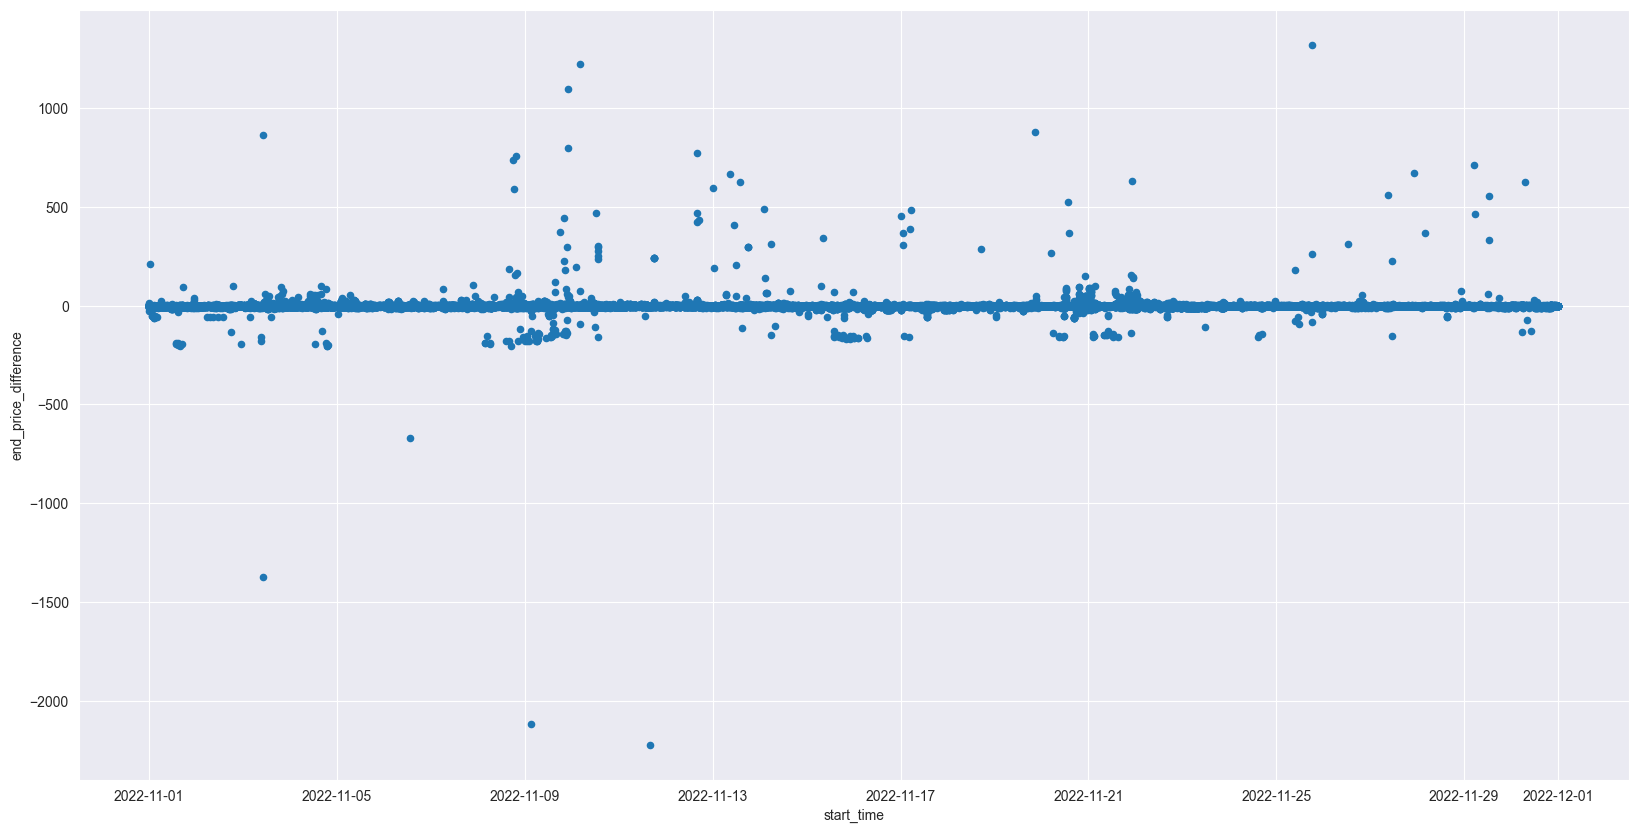

In [6]:
data['end_price_difference'] = data['end_buy_price'] - data['end_sell_price']
data.plot.scatter(x='start_time', y='end_price_difference', figsize=(20, 10))

<AxesSubplot: xlabel='total_time', ylabel='spread'>

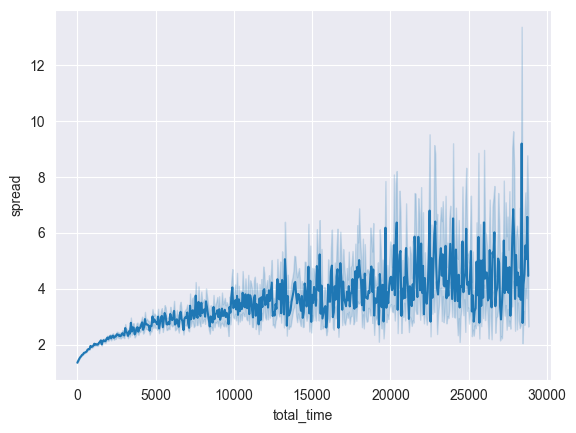

In [7]:
sns.lineplot(data=data.loc[(data['total_time'] <= 28800) & (data['spread'] < 20)], x="total_time", y="spread")

<AxesSubplot: xlabel='quote'>

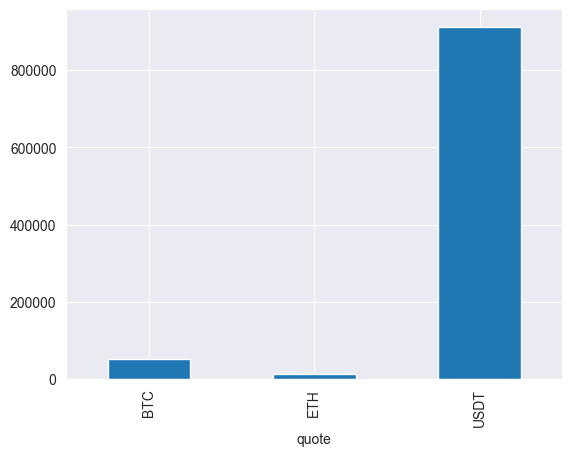

In [8]:
data['quote'] = data['ticker'].apply(lambda x: x.split('/')[1])
values = data.groupby('quote')['spread'].count()
values.plot.bar(x='quote', y='spread')

<AxesSubplot: xlabel='quote'>

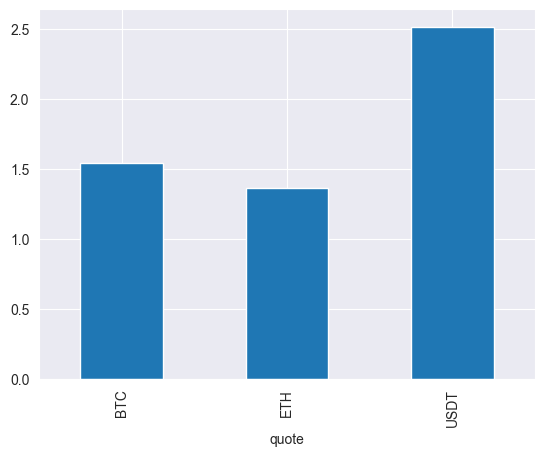

In [9]:
values = data.groupby('quote').apply(lambda x: x['spread'].mean())
values.plot.bar(x='quote', y='spread')

<AxesSubplot: >

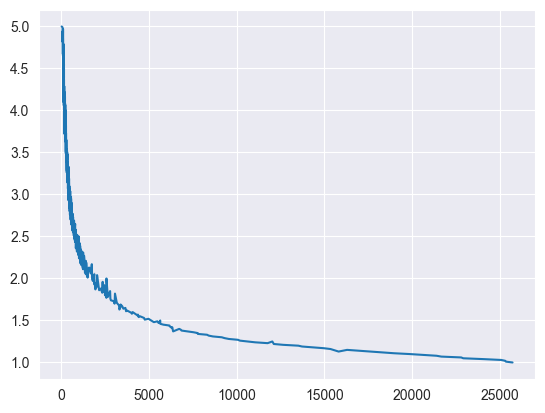

In [10]:
data['spread_float'] = data.loc[data['spread'] < 5]['spread'].apply(lambda x: round(x, 2))
values = data['spread_float'].value_counts()
sns.lineplot(x=values.values, y=values.index)

## Анализ бирж

### Где чаще всего покупают

<AxesSubplot: xlabel='buy_exchange'>

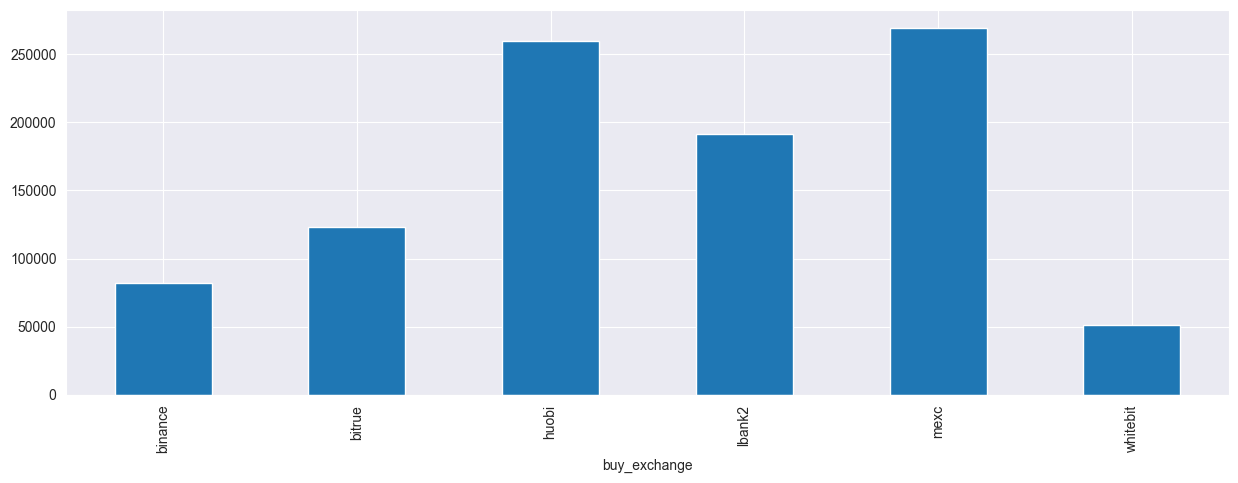

In [11]:
count_buy_exchanges = data.groupby('buy_exchange').apply(lambda x: x['spread'].count())
count_buy_exchanges.plot.bar(figsize=(15, 5))

### Где чаще всего продают

<AxesSubplot: xlabel='sell_exchange'>

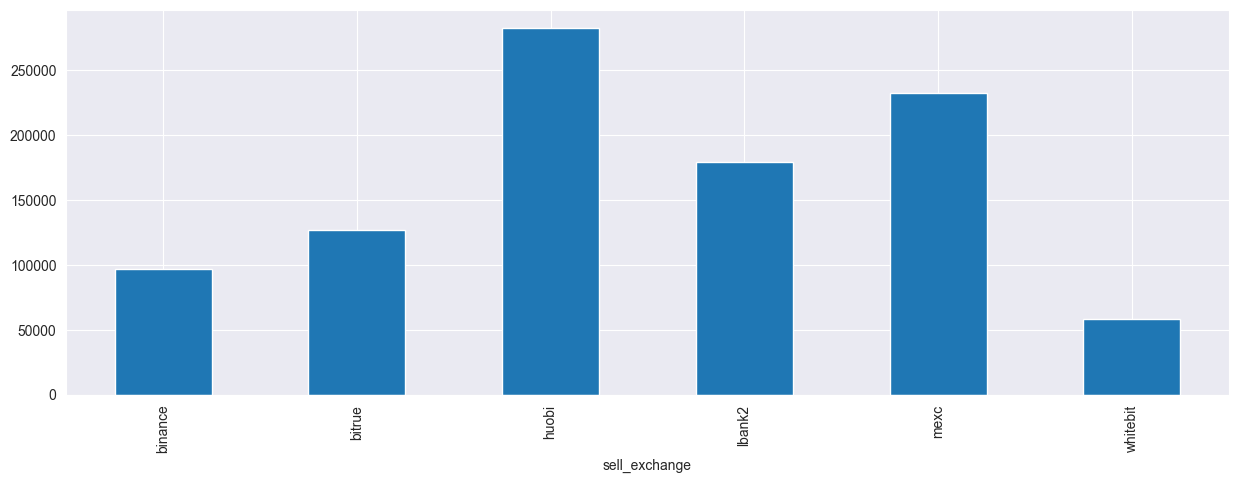

In [12]:
count_sell_exchanges = data.groupby('sell_exchange').apply(lambda x: x['spread'].count())
count_sell_exchanges.plot.bar(figsize=(15, 5))

### Средний spread у бирж где покупают

<AxesSubplot: xlabel='buy_exchange'>

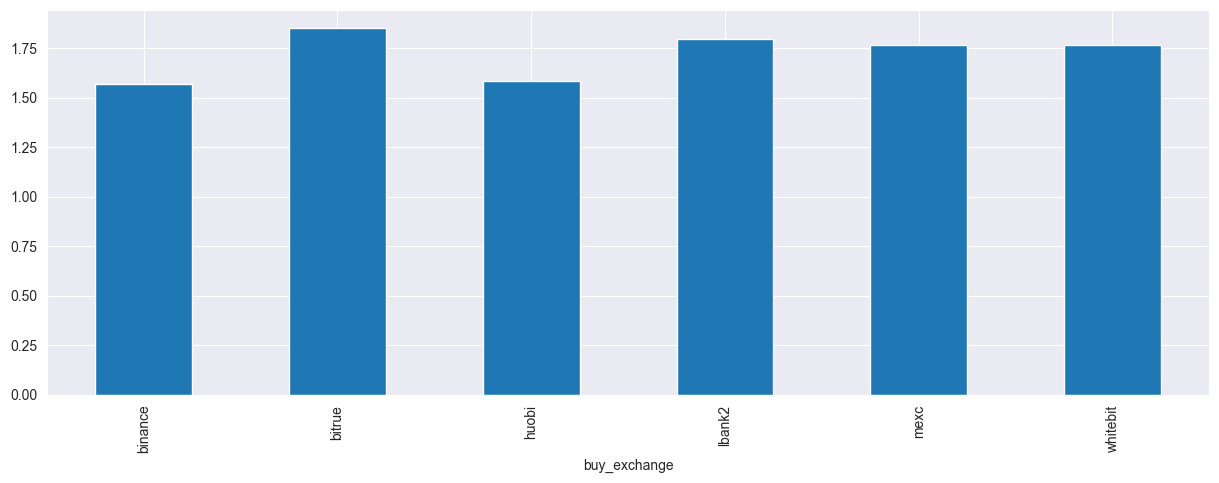

In [13]:
mean_buy_exchanges = data.loc[data['spread'] <= 50].groupby('buy_exchange').apply(lambda x: x['spread'].mean())
mean_buy_exchanges.plot.bar(figsize=(15, 5))

### Средний spread у бирж где продают

<AxesSubplot: xlabel='sell_exchange'>

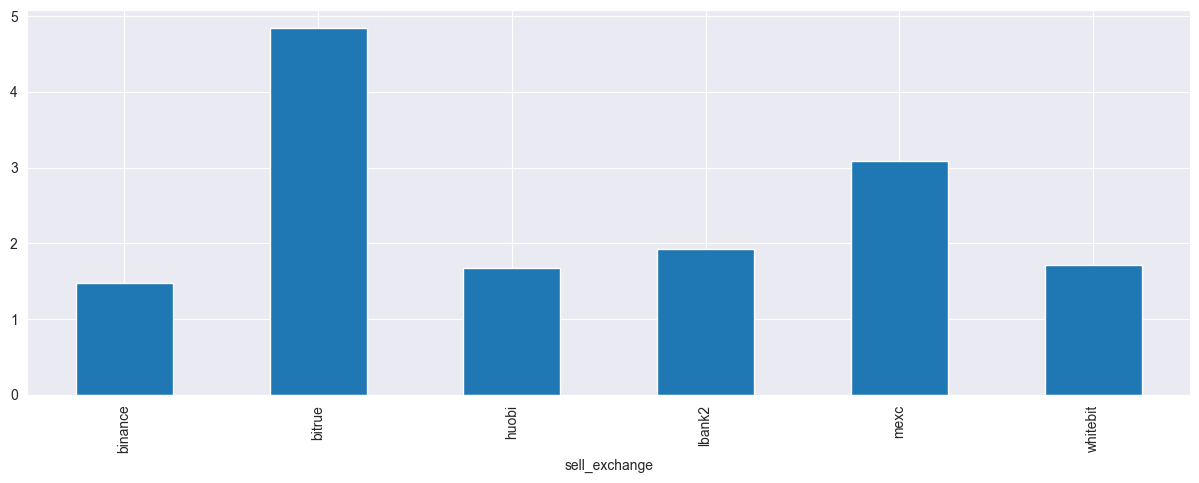

In [14]:
mean_sell_exchanges = data.groupby('sell_exchange').apply(lambda x: x['spread'].mean())
mean_sell_exchanges.plot.bar(figsize=(15, 5))